# Model Creation For Crowd Couter

In this notebook I'm about to create a model for crowd counter app based on object detection.
[Link to dataset](https://www.kaggle.com/datasets/constantinwerner/human-detection-dataset)

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

import helper_functions

## Data preparation

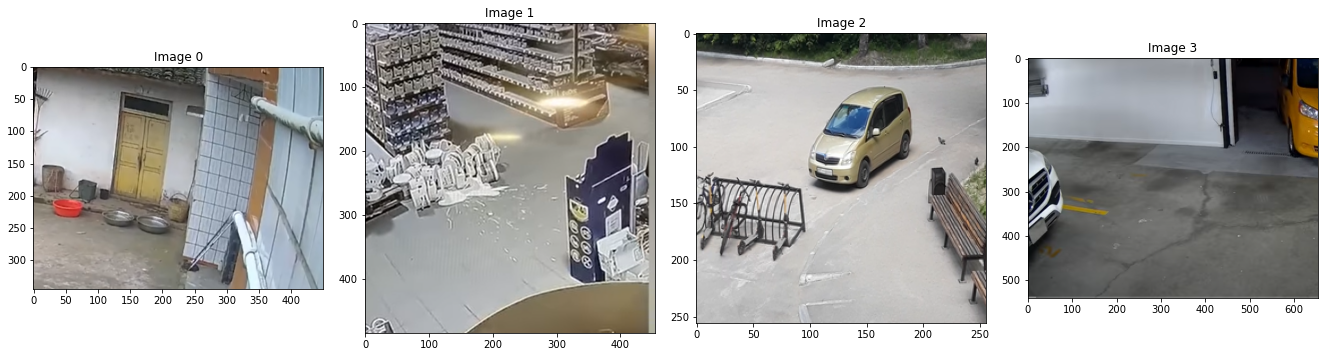

In [19]:
# plot some images without people

helper_functions.plot_images(label="0")

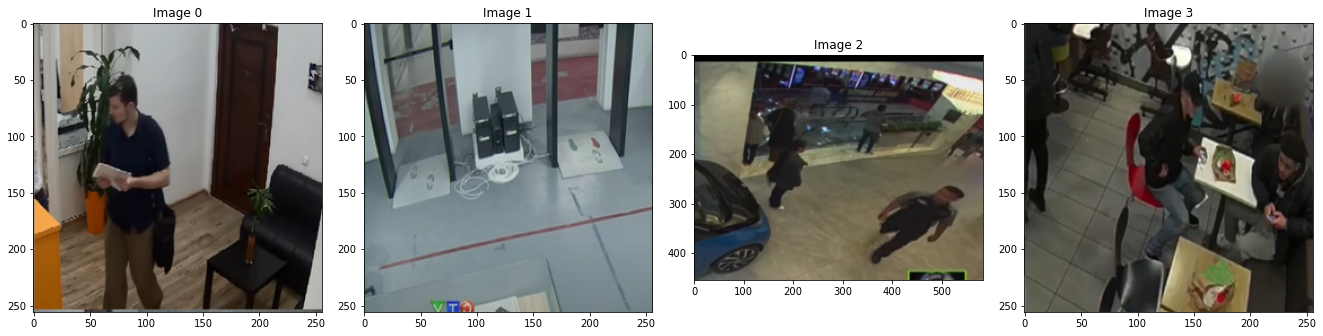

In [20]:
# plot some images with people

helper_functions.plot_images(label="1")

In [21]:
# as seen in above cells images are in different size, but it's
# not something that data preprocessing can't handle

# preprocessing (generating) data
datagen_v1 = ImageDataGenerator(rescale=1./255,
                                rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                validation_split=0.2)

# seed for further reproduction
tf.random.set_seed(13)

# set path to images
dir = "human-detection-dataset/"

# import data from <dir> and turn it into batches
data = datagen_v1.flow_from_directory(directory=dir,
                                      batch_size=32,
                                      target_size=(256,256),   # 256x256 is original size of most images
                                      class_mode="binary",
                                      seed=13)

Found 921 images belonging to 2 classes.


## Classification model

### Model

In [22]:
# some basic conv model from my another project to see if our datagen function works

i = i = Input(shape=(256, 256, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

baseline_model = Model(i, x)

 ### Training

In [23]:
baseline_model.compile(loss = "binary_crossentropy",
                       optimizer = "Adam",
                       metrics=["accuracy"])